<a href="https://colab.research.google.com/github/official-okello/DS_bootcamp_with_gomycode/blob/master/Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load dataset
import pandas as pd
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# preprocessing
data = df.drop('CustomerID',axis=1)
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [7]:
# creating clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = cluster.fit_predict(data)
agglomerative = pd.DataFrame(cluster_labels, columns=['Cluster'])
agglomerative.head()

,Cluster
0,4
1,3
2,4
3,3
4,4


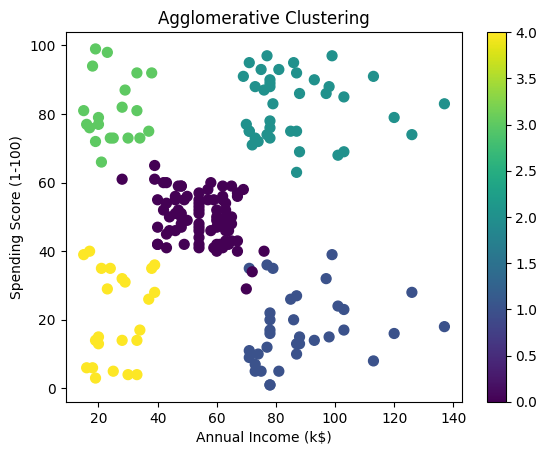

In [12]:
# visualize clusters
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c= agglomerative['Cluster'], s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
plt.colorbar(scatter)

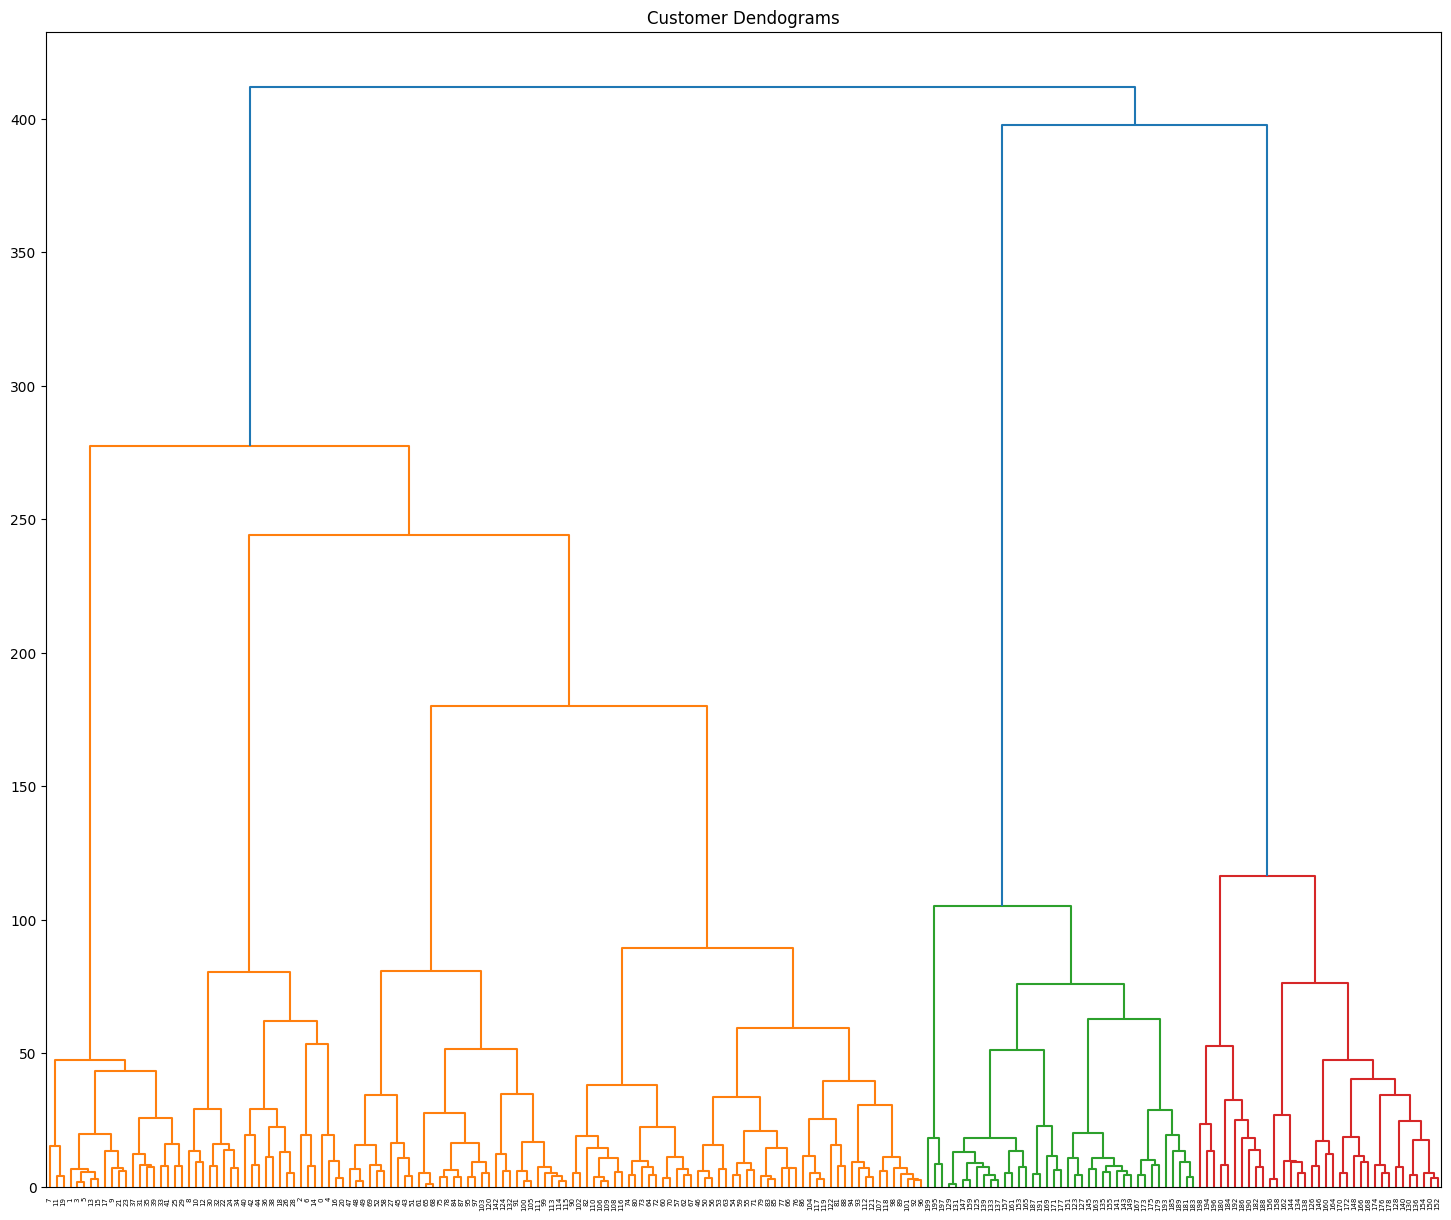

In [14]:
# dendrogram visualization
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(18, 15))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))